## We are using the Kaiming He weight initialization method since we are using the relu activation in the hidden layers and the Xavier initialization works better with tanH activation functions. 


# With weight initialization

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [3]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 512
NUM_HIDDEN_2 = 256
NUM_HIDDEN_3 = 128
NUM_HIDDEN_4 = 64
NUM_EPOCHS = 30
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [5]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [6]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, 
                 num_hidden_1, num_hidden_2, num_hidden_3, num_hidden_4):
        super().__init__()
        
        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # 3rd hidden layer
            torch.nn.Linear(num_hidden_2, num_hidden_3),
            torch.nn.ReLU(),
            # 4th hidden layer
            torch.nn.Linear(num_hidden_3, num_hidden_4),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_4, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()
           
    def forward(self, x):
        logits = self.my_network(x)
        return logits

Epoch: 001/030 | Batch 0000/0210 | Loss: 2.3298
Epoch: 001/030 | Batch 0050/0210 | Loss: 0.5838
Epoch: 001/030 | Batch 0100/0210 | Loss: 0.4012
Epoch: 001/030 | Batch 0150/0210 | Loss: 0.2878
Epoch: 001/030 | Batch 0200/0210 | Loss: 0.2138
Epoch: 001/030 | Train: 90.78% | Validation: 92.20%
Time elapsed: 0.05 min
Epoch: 002/030 | Batch 0000/0210 | Loss: 0.3131
Epoch: 002/030 | Batch 0050/0210 | Loss: 0.1784
Epoch: 002/030 | Batch 0100/0210 | Loss: 0.1214
Epoch: 002/030 | Batch 0150/0210 | Loss: 0.1502
Epoch: 002/030 | Batch 0200/0210 | Loss: 0.1010
Epoch: 002/030 | Train: 95.92% | Validation: 96.83%
Time elapsed: 0.11 min
Epoch: 003/030 | Batch 0000/0210 | Loss: 0.1363
Epoch: 003/030 | Batch 0050/0210 | Loss: 0.0982
Epoch: 003/030 | Batch 0100/0210 | Loss: 0.1485
Epoch: 003/030 | Batch 0150/0210 | Loss: 0.1356
Epoch: 003/030 | Batch 0200/0210 | Loss: 0.1350
Epoch: 003/030 | Train: 96.67% | Validation: 96.95%
Time elapsed: 0.16 min
Epoch: 004/030 | Batch 0000/0210 | Loss: 0.0557
Epoch: 

Epoch: 027/030 | Batch 0050/0210 | Loss: 0.0014
Epoch: 027/030 | Batch 0100/0210 | Loss: 0.0015
Epoch: 027/030 | Batch 0150/0210 | Loss: 0.0026
Epoch: 027/030 | Batch 0200/0210 | Loss: 0.0010
Epoch: 027/030 | Train: 100.00% | Validation: 98.38%
Time elapsed: 1.45 min
Epoch: 028/030 | Batch 0000/0210 | Loss: 0.0013
Epoch: 028/030 | Batch 0050/0210 | Loss: 0.0023
Epoch: 028/030 | Batch 0100/0210 | Loss: 0.0021
Epoch: 028/030 | Batch 0150/0210 | Loss: 0.0008
Epoch: 028/030 | Batch 0200/0210 | Loss: 0.0016
Epoch: 028/030 | Train: 100.00% | Validation: 98.38%
Time elapsed: 1.50 min
Epoch: 029/030 | Batch 0000/0210 | Loss: 0.0014
Epoch: 029/030 | Batch 0050/0210 | Loss: 0.0010
Epoch: 029/030 | Batch 0100/0210 | Loss: 0.0012
Epoch: 029/030 | Batch 0150/0210 | Loss: 0.0011
Epoch: 029/030 | Batch 0200/0210 | Loss: 0.0025
Epoch: 029/030 | Train: 100.00% | Validation: 98.37%
Time elapsed: 1.56 min
Epoch: 030/030 | Batch 0000/0210 | Loss: 0.0015
Epoch: 030/030 | Batch 0050/0210 | Loss: 0.0011
Epoc

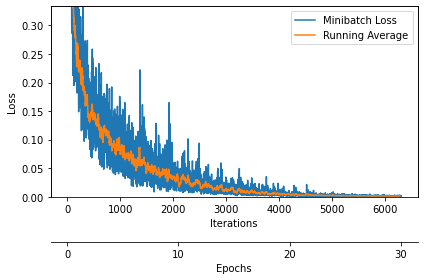

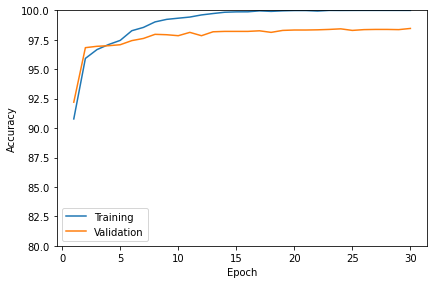

In [7]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             num_hidden_3=NUM_HIDDEN_3,
                             num_hidden_4=NUM_HIDDEN_4,
                             #drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

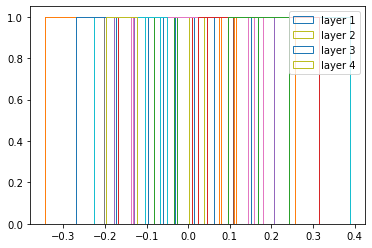

In [8]:
for name, param in model.named_parameters():
    if name == 'my_network.1.weight':
        weight_layer1 = param.data
    if name == 'my_network.3.weight':
        weight_layer2 = param.data
    if name == 'my_network.5.weight':
        weight_layer3 = param.data
    if name == 'my_network.7.weight':
        weight_layer4 = param.data
        
plt.hist(weight_layer1.flatten(), histtype='step', label = 'layer 1')
plt.hist(weight_layer2.flatten(), histtype='step', label = 'layer 2')
plt.hist(weight_layer3.flatten(), histtype='step', label = 'layer 3')
plt.hist(weight_layer4.flatten(), histtype='step', label = 'layer 4')
plt.legend(loc="upper right")


# Without weight initialization

In [18]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, 
                 num_hidden_1, num_hidden_2, num_hidden_3, num_hidden_4):
        super().__init__()
        
        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # 3rd hidden layer
            torch.nn.Linear(num_hidden_2, num_hidden_3),
            torch.nn.ReLU(),
            # 4th hidden layer
            torch.nn.Linear(num_hidden_3, num_hidden_4),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_4, num_classes)
        )
           
    def forward(self, x):
        logits = self.my_network(x)
        return logits

Epoch: 001/030 | Batch 0000/0210 | Loss: 2.3195
Epoch: 001/030 | Batch 0050/0210 | Loss: 2.2947
Epoch: 001/030 | Batch 0100/0210 | Loss: 2.2778
Epoch: 001/030 | Batch 0150/0210 | Loss: 2.1740
Epoch: 001/030 | Batch 0200/0210 | Loss: 1.8346
Epoch: 001/030 | Train: 61.11% | Validation: 62.33%
Time elapsed: 0.25 min
Epoch: 002/030 | Batch 0000/0210 | Loss: 1.1587
Epoch: 002/030 | Batch 0050/0210 | Loss: 0.7398
Epoch: 002/030 | Batch 0100/0210 | Loss: 0.9152
Epoch: 002/030 | Batch 0150/0210 | Loss: 0.5475
Epoch: 002/030 | Batch 0200/0210 | Loss: 0.5490
Epoch: 002/030 | Train: 84.99% | Validation: 87.60%
Time elapsed: 0.51 min
Epoch: 003/030 | Batch 0000/0210 | Loss: 0.4463
Epoch: 003/030 | Batch 0050/0210 | Loss: 0.3174
Epoch: 003/030 | Batch 0100/0210 | Loss: 0.3255
Epoch: 003/030 | Batch 0150/0210 | Loss: 0.3573
Epoch: 003/030 | Batch 0200/0210 | Loss: 0.3334
Epoch: 003/030 | Train: 92.33% | Validation: 93.72%
Time elapsed: 0.76 min
Epoch: 004/030 | Batch 0000/0210 | Loss: 0.2581
Epoch: 

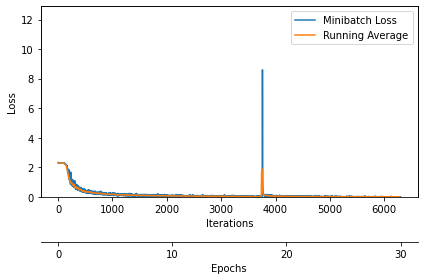

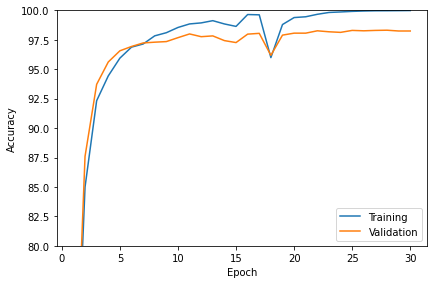

In [19]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             num_hidden_3=NUM_HIDDEN_3,
                             num_hidden_4=NUM_HIDDEN_4,
                             #drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

(array([1.100e+01, 1.270e+02, 1.078e+03, 3.000e+03, 2.796e+03, 8.740e+02,
        2.640e+02, 3.700e+01, 2.000e+00, 3.000e+00]),
 array([-0.31466323, -0.23400655, -0.15334989, -0.07269321,  0.00796345,
         0.08862013,  0.1692768 ,  0.24993347,  0.33059013,  0.4112468 ,
         0.49190348], dtype=float32),
 <a list of 1 Patch objects>)

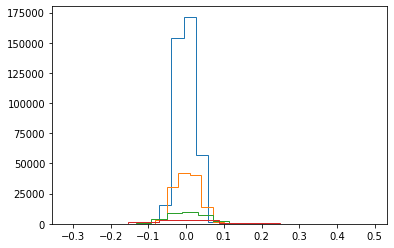

In [20]:
for name, param in model.named_parameters():
    if name == 'my_network.1.weight':
        weight_layer1 = param.data
    if name == 'my_network.3.weight':
        weight_layer2 = param.data
    if name == 'my_network.5.weight':
        weight_layer3 = param.data
    if name == 'my_network.7.weight':
        weight_layer4 = param.data
        
plt.hist(weight_layer1.flatten(), histtype='step', label = 'layer 1')
plt.hist(weight_layer2.flatten(), histtype='step', label = 'layer 2')
plt.hist(weight_layer3.flatten(), histtype='step', label = 'layer 3')
plt.hist(weight_layer4.flatten(), histtype='step', label = 'layer 4')


## Kaiming He has a wider histogram and has more variance. 

## The graphs of training and validation accuracies as a function of epochs for both the cases is pretty much the same except the fact that we notice a spike in case 2nd case i.e., when we dont do weight initialization.